In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:

class TimeSeriesData():
    
    def __init__(self,num_points,xmin,xmax):
        
        self.x_min = xmin
        self.x_max = xmax
        self.n_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
    
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
        
        # Grab a random starting point for each batch
        rand_start = np.random.rand(batch_size,1) 
        
        # Convert to be on time series
        ts_start = rand_start * (self.x_max- self.x_min - (steps*self.resolution) )
        
        # Create batch Time Series on t axis
        batch_ts = ts_start + np.arange(0.0,steps+1) * self.resolution
        
        # Create Y data for time series in the batches
        y_batch = np.sin(batch_ts)
        
        # Format for RNN
        if return_batch_ts:
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) ,batch_ts
        
        else:
            
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 
        

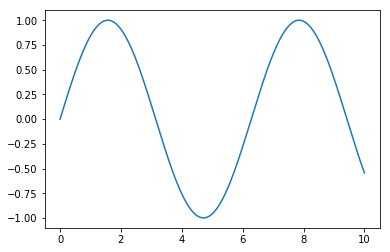

In [62]:
draw = TimeSeriesData(250,0,10)
plt.plot(draw.x_data,draw.y_true)

_________________________________

In [59]:
n_time_steps = 30

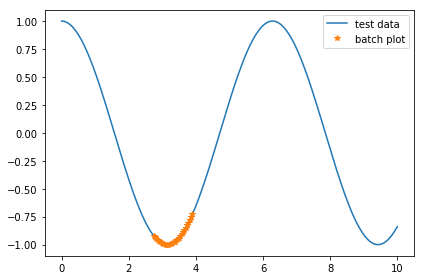

In [60]:
y1,y2,ts = draw.next_batch(1,n_time_steps,return_batch_ts=True)
plt.plot(draw.x_data,draw.y_true,label='test data')
plt.plot((ts.flatten()[1:]),(y2.flatten()),'*', label='batch plot')
plt.legend()
plt.tight_layout()

In [7]:
train_int = np.linspace(5,5+draw.resolution*(n_time_steps+1),n_time_steps+1)

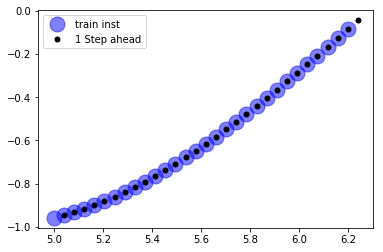

In [8]:

plt.plot(train_int[:-1],draw.ret_true(train_int[:-1]),"bo",markersize = 15,label='train inst', alpha =0.5)
plt.plot(train_int[1:],draw.ret_true(train_int[1:]),'ko',markersize=5,label='1 Step ahead')
plt.legend()

In [113]:
tf.reset_default_graph()

n_input  = 1
n_output = 1
neorons  = 100
learning_rate = 0.001
train_iterations = 2000
batch_size = 1

x = tf.placeholder(tf.float32, [None,n_time_steps,n_input])
y = tf.placeholder(tf.float32, [None, n_time_steps,n_output])

cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=neorons, activation=tf.nn.relu),
    output_size=n_output)

#  --------  In New Version of Tensorflow, Cell can be created this way too  ----------
# cell = tf.contrib.rnn.OutputProjectionWrapper(
#     tf.contrib.rnn.BasicRNNCell(num_units=neorons, activation=tf.nn.relu),
#     output_size=n_output)

out_put, state = tf.nn.dynamic_rnn(cell,x,dtype = tf.float32)

## Gradient Descent Optimizer

In [116]:
loss = tf.reduce_mean(tf.square(out_put-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
gradient_optimizer_loss = []


with tf.Session() as sess:
    sess.run(init)
    
    for i in range(train_iterations):
        x_bat , y_bat = draw.next_batch(batch_size,n_time_steps)
        sess.run(train,feed_dict={x:x_bat, y:y_bat})
        if i%100==0:
            loss_val = loss.eval(feed_dict={x:x_bat,y:y_bat})
            gradient_optimizer_loss.append(loss_val)
    print('Model Accuracy',1-loss_val)

Model Accuracy 0.9931860789656639


## Ada Delta Optimizer

In [117]:
loss = tf.reduce_mean(tf.square(out_put-y))
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
ada_delta_optimizer_loss = []


with tf.Session() as sess:
    sess.run(init)
    
    for i in range(train_iterations):
        x_bat , y_bat = draw.next_batch(batch_size,n_time_steps)
        sess.run(train,feed_dict={x:x_bat, y:y_bat})
        if i%100==0:
            loss_val = loss.eval(feed_dict={x:x_bat,y:y_bat})
            ada_delta_optimizer_loss.append(loss_val)
    print('Model Accuracy',1-loss_val)

Model Accuracy 0.86990125477314


## Ada Grad DA Optimizer

In [118]:
loss = tf.reduce_mean(tf.square(out_put-y))
global_step = tf.train.create_global_step()
optimizer = tf.train.AdagradDAOptimizer(learning_rate=learning_rate,global_step = global_step)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
adagrad_optimizer_loss = []


with tf.Session() as sess:
    sess.run(init)
    
    for i in range(train_iterations):
        x_bat , y_bat = draw.next_batch(batch_size,n_time_steps)
        sess.run(train,feed_dict={x:x_bat, y:y_bat})
        if i%100==0:
            loss_val = loss.eval(feed_dict={x:x_bat,y:y_bat})
            adagrad_optimizer_loss.append(loss_val)
    print('Model Accuracy',1-loss_val)

Model Accuracy 0.23917388916015625


## Momentum Optimizer

In [119]:
loss = tf.reduce_mean(tf.square(out_put-y))
optimizer = tf.train.MomentumOptimizer(learning_rate,0.9)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
momentum_optimizer_loss = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(train_iterations):
        x_bat , y_bat = draw.next_batch(batch_size,n_time_steps)
        sess.run(train,feed_dict={x:x_bat, y:y_bat})
        if i%100==0:
            loss_val = loss.eval(feed_dict={x:x_bat,y:y_bat})
            momentum_optimizer_loss.append(loss_val)
    print('Model Accuracy',1-loss_val)

Model Accuracy 0.9979055358562618


## Adam Optimizer

In [120]:
loss = tf.reduce_mean(tf.square(out_put-y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
adam_optimizer_loss = []


with tf.Session() as sess:
    sess.run(init)
    
    for i in range(train_iterations):
        x_bat , y_bat = draw.next_batch(batch_size,n_time_steps)

        
        
        sess.run(train,feed_dict={x:x_bat, y:y_bat})
        if i%100==0:
            loss_val = loss.eval(feed_dict={x:x_bat,y:y_bat})
            adam_optimizer_loss.append(loss_val)
    print('Model Accuracy',1-loss_val)

Model Accuracy 0.9998836797458353


# Plotting Loss Functions from All Optimzers

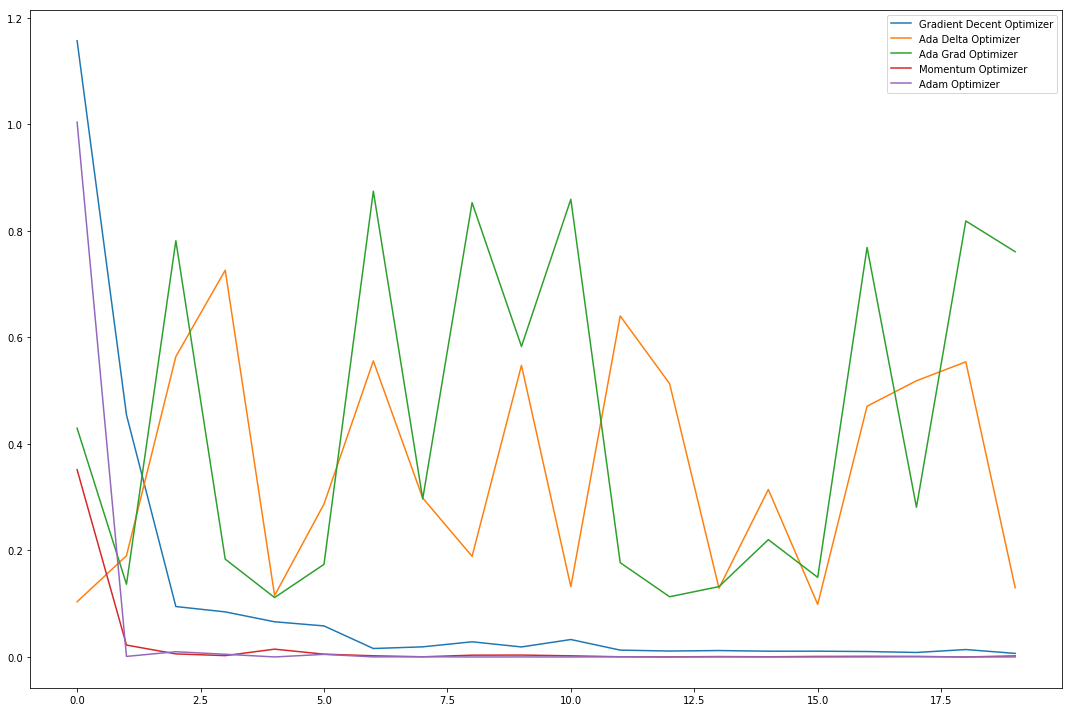

In [126]:
fig = plt.figure(figsize=[15.0,10.0])
ax = plt.subplot(111)


ax.plot(gradient_optimizer_loss,label='Gradient Decent Optimizer')
ax.plot(ada_delta_optimizer_loss,label='Ada Delta Optimizer')
ax.plot(adagrad_optimizer_loss, label='Ada Grad Optimizer')
ax.plot(momentum_optimizer_loss, label='Momentum Optimizer')
ax.plot(adam_optimizer_loss, label='Adam Optimizer')
# ax.ylabel('OverAll Loss')
ax.legend()
fig.tight_layout()


